# <a id='toc1_'></a>[Note:](#toc0_)

This script is created for the **AAE 722 Lab Session**, based on the lab exercises from the textbook *Introduction to Statistical Learning (ISL)*.


copyright: Jing Yi; jing.yi@wisc.edu

**Table of contents**<a id='toc0_'></a>    
- [Note:](#toc1_)    
- [PCA](#toc2_)    
  - [What is PCA?](#toc2_1_)    
    - [Concept](#toc2_1_1_)    
    - [Key Teaching Points](#toc2_1_2_)    
      - [How PCA Identifies Directions (Principal Components) that Maximize Variance](#toc2_1_2_1_)    
      - [Why Dimensionality Reduction is Useful in Regression Models, Especially with Multicollinearity](#toc2_1_2_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc2_'></a>[PCR Step by Step](#toc0_)

### <a id='toc2_1_1_'></a>[Concept: PCA](#toc0_)

**Principal Component Analysis (PCA)** is a dimensionality reduction technique that transforms a dataset with many variables into a smaller set of uncorrelated variables called **principal components**. These principal components capture most of the original data's **variance**, allowing us to:

- Reduce computational complexity
- Improve model performance
- Visualize high-dimensional data in lower dimensions


#### <a id='toc2_1_2_1_'></a>[How PCA Identifies Directions (Principal Components) that Maximize Variance](#toc0_)

- **Variance Maximization**: PCA finds new axes (principal components) that maximize the variance in the data.
- **Transformation**:
  - Original data is projected onto the principal components.
  - Resulting in a new set of variables that are linear combinations of the originals.

#### <a id='toc2_1_2_2_'></a>[Why Dimensionality Reduction is Useful in Regression Models, Especially with Multicollinearity](#toc0_)

- **Multicollinearity**:
  - Occurs when independent variables in a regression model are highly correlated.
  - Leads to instability in coefficient estimates and reduces model interpretability.
- **Benefits of PCA**:
  - **Reduces Multicollinearity**: By transforming correlated variables into a set of uncorrelated principal components.
  - **Simplifies Models**: Fewer variables mean simpler models that are easier to analyze and interpret.
  - **Enhances Performance**: Reduces overfitting by eliminating redundant features.
- **Practical Application**:
  - Use principal components as new features in regression models.
  - Improves predictive accuracy and model robustness.

---

**Next Steps**:

- **Hands-On Exercise**: Apply PCA to a sample dataset and observe how variance is distributed among principal components.
- **Visualization**: Create scatter plots of the first two principal components to visualize data structure.
- **Regression Analysis**: Build a regression model using principal components and compare it with a model using original variables.


Major League Baseball Data from the 1986 and 1987 seasons.

	•	AtBat: Number of times at bat in 1986
	•	Hits: Number of hits in 1986
	•	HmRun: Number of home runs in 1986
	•	Runs: Number of runs in 1986
	•	RBI: Number of runs batted in in 1986
	•	Walks: Number of walks in 1986
	•	Years: Number of years in the major leagues
	•	CAtBat: Number of times at bat during his career
	•	CHits: Number of hits during his career
	•	CHmRun: Number of home runs during his career
	•	CRuns: Number of runs during his career
	•	CRBI: Number of runs batted in during his career
	•	CWalks: Number of walks during his career
	•	League: A factor with levels A and N indicating the player’s league at the end of 1986
	•	Division: A factor with levels E and W indicating the player’s division at the end of 1986
	•	PutOuts: Number of putouts in 1986
	•	Assists: Number of assists in 1986
	•	Errors: Number of errors in 1986
	•	Salary: 1987 annual salary on opening day in thousands of dollars
	•	NewLeague: A factor with levels A and N indicating the player’s league at the beginning of 1987

## Import libraries:


In [5]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.api import OLS
import sklearn.model_selection as skm
import sklearn.linear_model as skl
from sklearn.preprocessing import StandardScaler
from ISLP import load_data
from ISLP.models import ModelSpec as MS
from functools import partial
# pip install l0bnb
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression
from ISLP.models import \
     (Stepwise,
      sklearn_selected,
      sklearn_selection_path)
from l0bnb import fit_path

In [2]:
Hitters = load_data('Hitters')
print(Hitters.shape)
np.isnan(Hitters['Salary'])
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna()
Hitters.shape

(322, 20)


(263, 20)

#### Code in the textbook to run a least squares regression model on the baseball data

In [4]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
X = design.transform(Hitters)
Y = np.array(Hitters['Salary'])

sigma2 = OLS(Y,X).fit().scale # the variance of residuals
print(sigma2)


99591.35617968219


### My code to develop a least squares regression model on the baseball data and get the variance of residuals: 

In [5]:
import statsmodels.api as sm
print('X:')
print(X[:3])
model_ols = sm.OLS(Y, X).fit()
print(model_ols.summary())
residuals = model_ols.resid
print('Residuals:')
print(residuals[:3])
print(model_ols.df_model) # number of independent variables in the mdoel

df = int(model_ols.df_model+1) # Adding 1 to account for the intercept
print('degree of freedom:',df)

residual_variance = np.var(residuals, ddof=df) #ddof: "Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof
print('residual variance:',residual_variance)


X:
   intercept  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
1        1.0    315    81      7    24   38     39     14    3449    835   
2        1.0    479   130     18    66   72     76      3    1624    457   
3        1.0    496   141     20    65   78     37     11    5628   1575   

   CHmRun  CRuns  CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  \
1      69    321   414     375        1.0          1.0      632       43   
2      63    224   266     263        0.0          1.0      880       82   
3     225    828   838     354        1.0          0.0      200       11   

   Errors  NewLeague[N]  
1      10           1.0  
2      14           0.0  
3       3           1.0  
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.511
Method:                 Least Squares   F-stat

In [66]:
design_pca = MS(Hitters.columns.drop('Salary'), intercept=False).fit(Hitters)
X_pca = design_pca.transform(Hitters)
Y = np.array(Hitters['Salary'])
print('shape:',X_pca.shape)
print(X_pca[:3])
print('Y:',Y[:3])

shape: (263, 19)
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   

   CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  Errors  \
1   414     375        1.0          1.0      632       43      10   
2   266     263        0.0          1.0      880       82      14   
3   838     354        1.0          0.0      200       11       3   

   NewLeague[N]  
1           1.0  
2           0.0  
3           1.0  
Y: [475. 480. 500.]


In [67]:
np.array(X_pca.loc[1])

array([3.150e+02, 8.100e+01, 7.000e+00, 2.400e+01, 3.800e+01, 3.900e+01,
       1.400e+01, 3.449e+03, 8.350e+02, 6.900e+01, 3.210e+02, 4.140e+02,
       3.750e+02, 1.000e+00, 1.000e+00, 6.320e+02, 4.300e+01, 1.000e+01,
       1.000e+00])

#### PCA

In [76]:
pca = PCA(n_components=2)
pca.fit(X_pca)  # Fit PCA 
print(pca.transform(X_pca)[:5])  # Transform the data to the first two principal components


[[ 7.91851288e+02  2.95732692e+02]
 [-1.06395731e+03  6.08154160e+02]
 [ 3.16175647e+03 -8.70467691e+01]
 [-2.39201731e+03  5.05156383e+02]
 [ 1.76950447e+03 -2.87643907e+00]]


In [131]:
print(X_pca[:2])

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  Errors  \
1   414     375        1.0          1.0      632       43      10   
2   266     263        0.0          1.0      880       82      14   

   NewLeague[N]  
1           1.0  
2           0.0  


In [132]:
from sklearn.decomposition import PCA
X_pca = design_pca.transform(Hitters)
pca_3 = PCA(n_components=3)
pca_3.fit(X_pca)  # Fit PCA (this also calculates the means internally)
print(X_pca[:2])
print('The three principle components:\n',pca_3.transform(X_pca)[:2])  # Transform the data to the first two principal components
print(pca_3.explained_variance_)

   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  Errors  \
1   414     375        1.0          1.0      632       43      10   
2   266     263        0.0          1.0      880       82      14   

   NewLeague[N]  
1           1.0  
2           0.0  
The three principle components:
 [[  791.85128836   295.73269213  -164.97942888]
 [-1063.95730776   608.15415992   -79.30541972]]
[5908900.06274085   81542.70214538   30024.17833788]


The two columns in the output are the two compoennts created by pca. 

#### I want to replicate the principle components: 
- By default, PCA subtracts the mean of each feature before computing the principal components.

- Center the Data: Subtract the mean of each feature from the corresponding feature values (but do not scale by standard deviation unless you're explicitly standardizing).

- Apply PCA Loadings: Use the principal component loadings (the matrix from pca.components_) to transform the centered data.

In [134]:
X_pca = design_pca.transform(Hitters)
pca = PCA(n_components=2)
pca.fit(X_pca)

X_mean = pca.mean_
print('X_mean:',X_mean[0])
X_centered = X_pca - X_mean
print('X_centered:',X_centered[:2])
X_manual_pca = np.dot(X_centered, pca.components_.T)

# Compare with the PCA transformation results
X_pca = pca.transform(X_pca)

# Print both to compare
print("\nManual PCA transformation (first 3 rows):")
print(X_manual_pca[:3], "\n")

print("PCA transform() output (first 3 rows):")
print(X_pca[:3])


X_mean: 403.6425855513308
X_centered:        AtBat       Hits     HmRun       Runs        RBI      Walks     Years  \
1 -88.642586 -26.828897 -4.619772 -30.745247 -13.486692  -2.114068  6.688213   
2  75.357414  22.171103  6.380228  11.254753  20.513308  34.885932 -4.311787   

        CAtBat       CHits    CHmRun       CRuns       CRBI     CWalks  \
1   791.456274  112.813688 -0.239544  -40.220532  83.581749  114.73384   
2 -1033.543726 -265.186312 -6.239544 -137.220532 -64.418251    2.73384   

   League[N]  Division[W]     PutOuts    Assists    Errors  NewLeague[N]  
1   0.528517     0.490494  341.288973 -75.760456  1.406844      0.536122  
2  -0.471483     0.490494  589.288973 -36.760456  5.406844     -0.463878  

Manual PCA transformation (first 3 rows):
[[  791.85128836   295.73269213]
 [-1063.95730776   608.15415992]
 [ 3161.75646923   -87.0467691 ]] 

PCA transform() output (first 3 rows):
[[  791.85128836   295.73269213]
 [-1063.95730776   608.15415992]
 [ 3161.75646923   -87.

### Variance explained by each component:

In [149]:
X_pca = design_pca.transform(Hitters)
print(X_pca[:2])
pca_4 = PCA(n_components=4)
pca_4.fit(X_pca)
print(pca_4.transform(X_pca)[:2])
print(pca_4.explained_variance_ratio_)
print('pca variance:',pca_4.explained_variance_)

tot_var = X_pca.var(axis=0).sum()
print(tot_var)
5908900.06274085/tot_var


   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   

   CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  Errors  \
1   414     375        1.0          1.0      632       43      10   
2   266     263        0.0          1.0      880       82      14   

   NewLeague[N]  
1           1.0  
2           0.0  
[[  791.85128836   295.73269213  -164.97942888   148.87295489]
 [-1063.95730776   608.15415992   -79.30541972   -44.26044953]]
[0.97435041 0.01344602 0.00495085 0.002779  ]
pca variance: [5908900.06274085   81542.70214538   30024.17833788   16853.10770931]
6064450.740487037


0.974350409558493

In [146]:
X_pca = design_pca.transform(Hitters)

pipe = Pipeline ([('pca', pca),
('linreg', linreg)])
pipe.fit(X_pca, Y)
print(pipe.named_steps ['linreg'].coef_)
print(pipe.named_steps['pca'].explained_variance_ratio_)
print(0.97435041 + 0.01344602)

print(pipe.named_steps['pca'].variance.sum())

[0.09846131 0.4758765 ]
[0.97435041 0.01344602]
0.98779643
6064450.740487037


AttributeError: 'PCA' object has no attribute 'variance'

#### Develop the PCR

In [135]:
X_pca = design_pca.transform(Hitters)
pca = PCA(n_components=2)
pca.fit(X_pca)
print('\n PCA Weights:')
print(pca.components_)
print('\n Principle Components:')
print(pca.transform(X_pca)[:2])

model_pcr_1 = sm.OLS(Y, pca.transform(X_pca)).fit()
print(model_pcr_1.summary())


 PCA Weights:
[[ 1.27295464e-02  3.90191783e-03  7.99872158e-04  1.85236330e-03
   3.01112202e-03  2.45379988e-03  1.80239713e-03  9.40588154e-01
   2.65513609e-01  2.72425129e-02  1.34127407e-01  1.26781753e-01
   9.87326458e-02 -5.13849953e-06 -4.12314423e-06  6.49966284e-03
  -6.51780304e-04 -1.95885882e-04 -1.11198412e-06]
 [ 2.08544062e-01  6.19266452e-02  9.32512521e-03  3.23615571e-02
   3.49259179e-02  2.51018911e-02 -1.54794144e-03 -2.84510004e-02
   3.00032864e-02  1.87729703e-02  1.06654929e-02  5.68258073e-02
   2.04114841e-03  3.04643731e-05 -5.49003242e-05  9.71722826e-01
  -5.19017916e-03  2.55867256e-03  6.70931813e-05]]

 Principle Components:
[[  791.85128836   295.73269213]
 [-1063.95730776   608.15415992]]
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.154
Model:                            OLS   Adj. R-squared (uncentered):              0.148

## Integrate the above steps into one function for PCR


In [107]:
# ------------------------Data Preprocessing------------------------
# Get the data:
Hitters = load_data('Hitters')
print(Hitters.shape)
np.isnan(Hitters['Salary'])
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna()

design_pca = MS(Hitters.columns.drop('Salary'), intercept=False).fit(Hitters)
X_pca = design_pca.transform(Hitters)
Y = np.array(Hitters['Salary'])
# ------------------------Data Preprocessing------------------------

# n_components=2: This parameter specifies the number of principal components that you want to keep after the dimensionality reduction. 
# In this case, it is set to 2, meaning the data will be projected onto a 2-dimensional space. 
# PCA will find the top two directions (or components) that capture the most variance in the dataset.
pca = PCA(n_components=2)

# Below, a Linear Regression model is initialized. This model will be used to fit the data after it has been transformed by PCA.
linreg = skl.LinearRegression()

# This line below creates a Pipeline that combines two steps:
# The first step is 'pca', which applies the PCA transformation to reduce the data to 2 dimensions.
# The second step is 'linreg', which fits a linear regression model using the components created by PCA.
# A pipeline is useful because it allows these steps to be executed sequentially without needing to manually transform and pass the data between models. 
# It also helps ensure that transformations like PCA are applied consistently across training and testing sets.
pipe = Pipeline([('pca', pca),
                 ('linreg', linreg)])

# Now, we fit the pipeline to the training data.
# The PCA step will first transform the predictors X_pca into the two principal components, 
# and then the linear regression model will be trained on these components to predict the target variable Y.
pipe.fit(X_pca, Y)

# After fitting the model, we access the coefficients from the fitted linear regression model.
# Since we have used PCA to reduce the dimensionality to two components, 
# the linear regression will have two coefficients, corresponding to the two principal components.
print(pipe.named_steps['linreg'].coef_)  # This prints the coefficients of the linear regression model.



(322, 20)
[0.09846131 0.4758765 ]


### Standarization of the data

#### StandardScaler:
When performing PCA, the results vary depending on whether the data has been *standardized* or not.
As in the earlier examples, this can be accomplished by including an additional step in the pipeline.

Standardization is a common preprocessing step in machine learning, particularly useful when applying algorithms like PCA, which are sensitive to the scale of the data.

StandardScaler:
1.	with_mean=True:
- This indicates that the mean of each feature should be centered to 0 by subtracting the mean of each feature from the data.
- For each feature in the dataset, the mean value will be calculated, and that mean will be subtracted from every data point in that feature.
- This transformation ensures that each feature has a mean of 0, helping to align all the variables on a common scale, especially when they originally have very different ranges or units.

2.	with_std=True:
- This indicates that the standard deviation of each feature should be scaled to 1. After subtracting the mean, each feature is divided by its standard deviation to normalize its spread.
- Standard deviation measures the spread of the data around the mean, and dividing by it standardizes the feature, giving each feature a standard deviation of 1.

$x_{scaled} = \frac{x - \mu}{\sigma}$



In [113]:
# ------------------------Data Preprocessing------------------------
# Get the data:
Hitters = load_data('Hitters')
print(Hitters.shape)
np.isnan(Hitters['Salary'])
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna()

design_pca = MS(Hitters.columns.drop('Salary'), intercept=False).fit(Hitters)
X_pca = design_pca.transform(Hitters)
Y = np.array(Hitters['Salary'])
# ------------------------Data Preprocessing------------------------

scaler = StandardScaler(with_mean=True,  with_std=True)
X_scaled = scaler.fit_transform(X_pca)
print('X_scaled:',X_scaled[:3])
print(X_pca.sum())
print('\nX_scaled Mean:',np.mean(X_scaled, axis=0))
print('\nX_scaled Variance:',np.var(X_scaled, axis=0))

(322, 20)
X_scaled: [[-0.6029005  -0.59567545 -0.5285512  -1.2061115  -0.52206292 -0.0975271
   1.3978935   0.3467905   0.1743734  -0.0029198  -0.12167086  0.25896561
   0.43533435  1.05875764  0.98116592  1.22149851 -0.52319133  0.21335208
   1.07505242]
 [ 0.51254171  0.49225957  0.72996619  0.44151497  0.79405962  1.6093726
  -0.90120024 -0.45286539 -0.4098921  -0.07605382 -0.41510491 -0.19959036
   0.010373   -0.94450322  0.98116592  2.10910888 -0.25386267  0.81996395
  -0.9301872 ]
 [ 0.62816682  0.73648988  0.95878753  0.40228577  1.02631654 -0.18979195
   0.77086793  1.30155773  1.31817358  1.89856469  1.41205144  1.57266648
   0.3556541   1.05875764 -1.01919561 -0.32466148 -0.74417894 -0.84821868
   1.07505242]]
AtBat           106158.0
Hits             28359.0
HmRun             3056.0
Runs             14398.0
RBI              13541.0
Walks            10813.0
Years             1923.0
CAtBat          698934.0
CHits           189935.0
CHmRun           18210.0
CRuns            950

#### Add the standariation step to the function: 


In [114]:
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline([('scaler', scaler), 
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_


array([106.36859204, -21.60350456])

### Develop a cross validation to check the test error: 

In [129]:
# ------------------------Data Preprocessing------------------------
# Step 1: Get the data:
Hitters = load_data('Hitters')
print(Hitters.shape)
np.isnan(Hitters['Salary'])
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna()

design_pca = MS(Hitters.columns.drop('Salary'), intercept=False).fit(Hitters)
X_pca = design_pca.transform(Hitters)
Y = np.array(Hitters['Salary'])
# ------------------------Data Preprocessing------------------------

# Step 2: standardize the data
scaler = StandardScaler(with_mean=True,  with_std=True)
X_scaled = scaler.fit_transform(X_pca)


# Step 3: PCA:
pca_2 = PCA(n_components=2)
pca_2.fit(X_scaled)  # Fit PCA 
X_pca2 = pca_2.transform(X_scaled)  # Transform the data to the first two principal components

# Step 4: Linear Regression
model_pcr = sm.OLS(Y, X_pca2).fit()
# print(model_pcr.summary())

# =====Step 5: Cross Validate for 2 principal components to get test errors=====
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)


linreg = skl.LinearRegression()

pipe_jing = Pipeline([
    ('pca', PCA(n_components=2)),  # Step 1: PCA transformation
    ('linreg', linreg)             # Step 2: Linear regression model
])

cv_results = skm.cross_validate(pipe_jing,       # The pipeline containing PCA and linear regression
                                X_scaled,   # The standardized data (before PCA)
                                Y,          # The target variable (Salary)
                                cv=kfold,   # K-Fold cross-validation
                                scoring='neg_mean_squared_error')  # Scoring: MSE (negative to maximize)

# Step 8: Calculate the mean of the negative MSE and convert it back to positive MSE
mean_mse = -cv_results['test_score'].mean()  # Negate it to get the positive MSE
print(f'Mean cross-validated MSE: {mean_mse}')


(322, 20)
Mean cross-validated MSE: 121692.50834601055


In [130]:
pipe_jing = Pipeline([
    ('pca', PCA(n_components=18)),  # Step 1: PCA transformation
    ('linreg', linreg)             # Step 2: Linear regression model
])

cv_results = skm.cross_validate(pipe_jing,       # The pipeline containing PCA and linear regression
                                X_scaled,   # The standardized data (before PCA)
                                Y,          # The target variable (Salary)
                                cv=kfold,   # K-Fold cross-validation
                                scoring='neg_mean_squared_error')  # Scoring: MSE (negative to maximize)

# Step 8: Calculate the mean of the negative MSE and convert it back to positive MSE
mean_mse = -cv_results['test_score'].mean()  # Negate it to get the positive MSE
print(f'Mean cross-validated MSE (18 Components:): {mean_mse}')

Mean cross-validated MSE (18 Components:): 116693.60344139813


### Integrate the cross validation into a function:

In [118]:
import sklearn.model_selection as skm

# Define the number of folds (K) for K-Fold cross-validation.
K = 5

# Initialize the K-Fold cross-validator from scikit-learn.
# KFold will split the data into K=5 folds, used for cross-validation.
kfold = skm.KFold(K,                 # Number of splits/folds (5 in this case)
                  random_state=0,    # Set a random seed to ensure reproducibility of the splits
                  shuffle=True)      # Shuffle the data before splitting it into folds

# Define the range of possible values for the number of principal components (n_components) in PCA
# This is a dictionary where 'pca__n_components' refers to the 'n_components' parameter in the PCA step of the pipeline.
param_grid = {'pca__n_components': range(1, 20)}

# Perform a grid search over the number of principal components using cross-validation (cv).
# GridSearchCV searches over the specified 'param_grid' to find the optimal value for 'n_components'.
# The pipeline (pipe) contains both the PCA and Linear Regression steps, and cv=kfold specifies cross-validation folds.
# 'scoring' is set to 'neg_mean_squared_error', which means the grid search will optimize for the lowest mean squared error (MSE).
grid = skm.GridSearchCV(pipe,        # The pipeline containing PCA and regression
                        param_grid,  # The hyperparameter grid we defined above (for PCA n_components)
                        cv=kfold,    # The cross-validation strategy (e.g., K-Fold cross-validation)
                        scoring='neg_mean_squared_error')  # The metric to optimize for is negative MSE

# Fit the grid search to the data (X as features and Y as the target variable).
# The grid search will test each value of 'n_components' in the range of 1 to 19, perform cross-validation,
# and determine the optimal number of principal components based on the lowest mean squared error.
grid.fit(X_pca, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA(n_components=2)),
                                       ('linreg', LinearRegression())]),
             param_grid={'pca__n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

### Check and plot the results

In [124]:
import pandas as pd

# Extract the specific values you need from grid search results
mean_test_score = -grid.cv_results_['mean_test_score']  # Mean test scores (negated to get positive MSE)
n_components = param_grid['pca__n_components']  # Number of principal components

# Create a DataFrame with two columns: 'Components' and 'MSE'
df_cv = pd.DataFrame({
    'Components': n_components,  # Number of principal components
    'MSE': mean_test_score       # Mean test score (MSE)
})

# Display the DataFrame
print(df_cv)


    Components            MSE
0            1  121340.985159
1            2  121646.093845
2            3  122821.195896
3            4  121475.569142
4            5  119562.582993
5            6  117752.648780
6            7  119745.149068
7            8  120219.352466
8            9  122496.323487
9           10  121971.976095
10          11  123650.046265
11          12  125293.450319
12          13  129773.218736
13          14  124303.074298
14          15  124644.583927
15          16  116902.505498
16          17  116222.021767
17          18  116806.120526
18          19  122698.799009


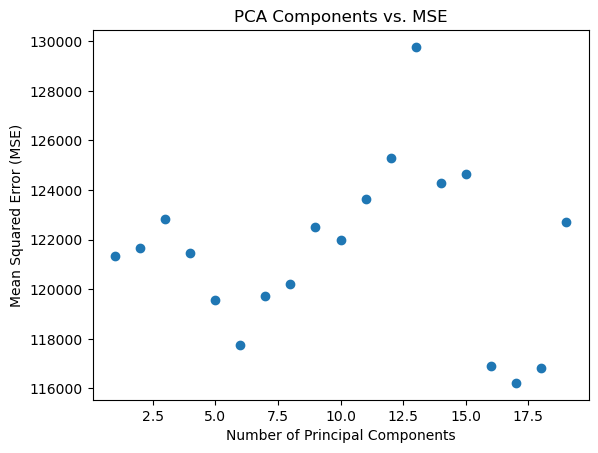

In [125]:
import matplotlib.pyplot as plt
plt.scatter(df_cv['Components'], df_cv['MSE'])
plt.xlabel('Number of Principal Components')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('PCA Components vs. MSE')
plt.show()

(50000.0, 250000.0)

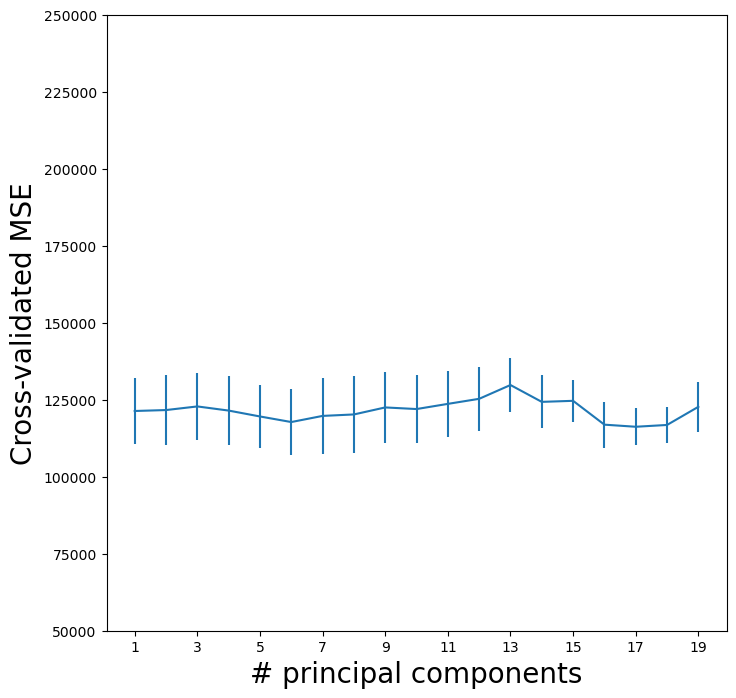

In [119]:
# Create a new figure and axis for plotting the results of PCR (Principal Component Regression)
pcr_fig, ax = subplots(figsize=(8,8))  # Set figure size to 8x8 inches

# Extract the number of principal components from the parameter grid
n_comp = param_grid['pca__n_components']  # This gives the range of 'n_components' from 1 to 19

# Plot the cross-validated mean test score (negative MSE) with error bars representing the standard error
# 'mean_test_score' gives the mean of the test scores from cross-validation, and 'std_test_score' gives the standard deviation.
ax.errorbar(n_comp,                        # X-axis: Number of principal components
            -grid.cv_results_['mean_test_score'],  # Y-axis: Mean test score (negative MSE, hence the minus sign)
            grid.cv_results_['std_test_score'] / np.sqrt(K))  # Error bars: Standard error = std_test_score / sqrt(K); 
# grid.cv_results_['std_test_score']: measures the variability/spread of the cross-validated MSEs across different training and validation splits.

# Set the labels for the Y-axis and X-axis with a large font size for better readability
ax.set_ylabel('Cross-validated MSE', fontsize=20)  # Label for the Y-axis
ax.set_xlabel('# principal components', fontsize=20)  # Label for the X-axis

# Set custom X-axis tick marks, using every second value from the range of principal components
ax.set_xticks(n_comp[::2])  # Show tick marks on the X-axis for every 2 components

# Set the limits for the Y-axis to display MSE between 50,000 and 250,000
ax.set_ylim([50000, 250000])  # Limits for the Y-axis (Cross-validated MSE range)



# PLS

### Partial Least Squares
Partial least squares (PLS) is implemented in the
`PLSRegression()`  function.

 

In [151]:
pls = PLSRegression(n_components=2, 
                    scale=True)
pls.fit(X, Y)


PLSRegression()

As was the case in PCR, we will want to
use CV to choose the number of components.

In [153]:
param_grid = {'n_components':range(1, 20)}
grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)


GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=PLSRegression(),
             param_grid={'n_components': range(1, 20)},
             scoring='neg_mean_squared_error')

As for our other methods, we plot the MSE.

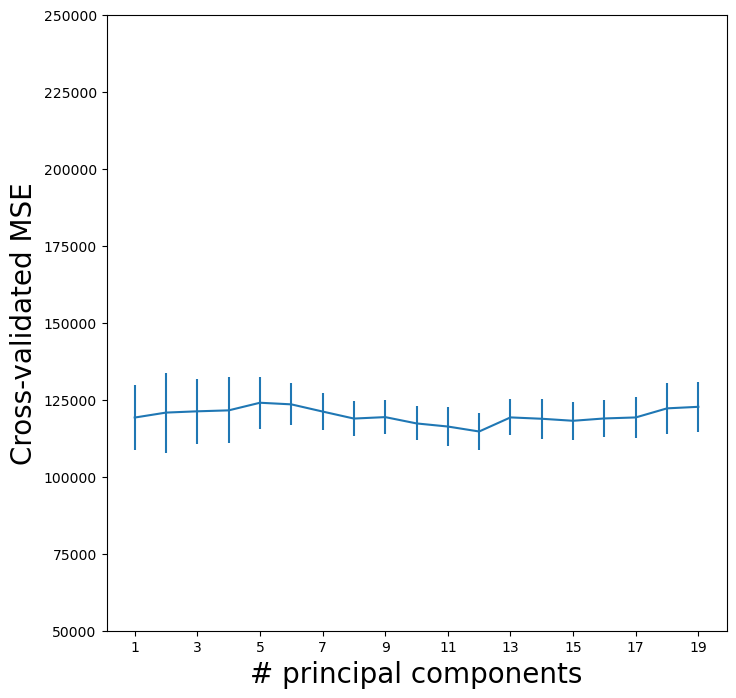

In [154]:
pls_fig, ax = subplots(figsize=(8,8))
n_comp = param_grid['n_components']
ax.errorbar(n_comp,
            -grid.cv_results_['mean_test_score'],
            grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel('Cross-validated MSE', fontsize=20)
ax.set_xlabel('# principal components', fontsize=20)
ax.set_xticks(n_comp[::2])
ax.set_ylim([50000,250000]);


CV error is minimized at 12,
though there is little noticable difference between this point and a much lower number like 2 or 3 components.



## Subset Selection Methods
Here we implement methods that reduce the number of parameters in a
model by restricting the model to a subset of the input variables.

### Forward Selection
 
We will  apply the forward-selection approach to the  `Hitters` 
data.  We wish to predict a baseball player’s `Salary` on the
basis of various statistics associated with performance in the
previous year.

First of all, we note that the `Salary` variable is missing for
some of the players.  The `np.isnan()`  function can be used to
identify the missing observations. It returns an array
of the same shape as the input vector, with a `True` for any elements that
are missing, and a `False` for non-missing elements.  The
`sum()`  method can then be used to count all of the
missing elements.

We first choose the best model using forward selection based on $C_p$ (\ref{Ch6:eq:cp}). This score
is not built in as a metric to `sklearn`. We therefore define a function to compute it ourselves, and use
it as a scorer. By default, `sklearn` tries to maximize a score, hence
  our scoring function  computes the negative $C_p$ statistic.

In [157]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator.predict(X)
    RSS = np.sum((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n 


We need to estimate the residual variance $\sigma^2$, which is the first argument in our scoring function above.
We will fit the biggest model, using all the variables, and estimate $\sigma^2$ based on its MSE.

In [158]:
# Get the data:
Hitters = load_data('Hitters')
print(Hitters.shape)
np.isnan(Hitters['Salary'])
np.isnan(Hitters['Salary']).sum()
Hitters = Hitters.dropna()
Hitters.shape

design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])
X = design.transform(Hitters)
sigma2 = OLS(Y,X).fit().scale
print(sigma2)

(322, 20)
99591.35617968219


### Another way to get the varaince of residuals: 

In [159]:
import statsmodels.api as sm
print('X:')
print(X[:3])
model_ols = sm.OLS(Y, X).fit()
residuals = model_ols.resid
print('Residuals:')
print(residuals[:3])
print(model_ols.df_model)

df = int(model_ols.df_model+1)
print('degree of freedom:',df)

residual_variance = np.var(residuals, ddof=df)
print('residual variance:',residual_variance)


X:
   intercept  AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  \
1        1.0    315    81      7    24   38     39     14    3449    835   
2        1.0    479   130     18    66   72     76      3    1624    457   
3        1.0    496   141     20    65   78     37     11    5628   1575   

   CHmRun  CRuns  CRBI  CWalks  League[N]  Division[W]  PutOuts  Assists  \
1      69    321   414     375        1.0          1.0      632       43   
2      63    224   266     263        0.0          1.0      880       82   
3     225    828   838     354        1.0          0.0      200       11   

   Errors  NewLeague[N]  
1      10           1.0  
2      14           0.0  
3       3           1.0  
Residuals:
1    112.863934
2   -232.695206
3   -671.311111
dtype: float64
19.0
degree of freedom: 20
residual variance: 99591.35617968219


The function `sklearn_selected()` expects a scorer with just three arguments --- the last three in the definition of `nCp()` above. We use the function `partial()` first seen in Section~\ref{Ch5-resample-lab:the-bootstrap} to freeze the first argument with our estimate of $\sigma^2$.

In [160]:
neg_Cp = partial(nCp, sigma2)

We can now use `neg_Cp()` as a scorer for model selection.


Along with a score we need to specify the search strategy. This is done through the object
`Stepwise()`  in the `ISLP.models` package. The method `Stepwise.first_peak()`
runs forward stepwise until any further additions to the model do not result
in an improvement in the evaluation score. Similarly, the method `Stepwise.fixed_steps()`
runs a fixed number of steps of stepwise search.

In [161]:
strategy = Stepwise.first_peak(design,
                               direction='forward',
                               max_terms=len(design.terms))


We now fit a linear regression model with `Salary` as outcome using forward
selection. To do so, we use the function `sklearn_selected()`  from the `ISLP.models` package. This takes
a model from `statsmodels` along with a search strategy and selects a model with its
`fit` method. Without specifying a `scoring` argument, the score defaults to MSE, and so all 19 variables will be
selected.
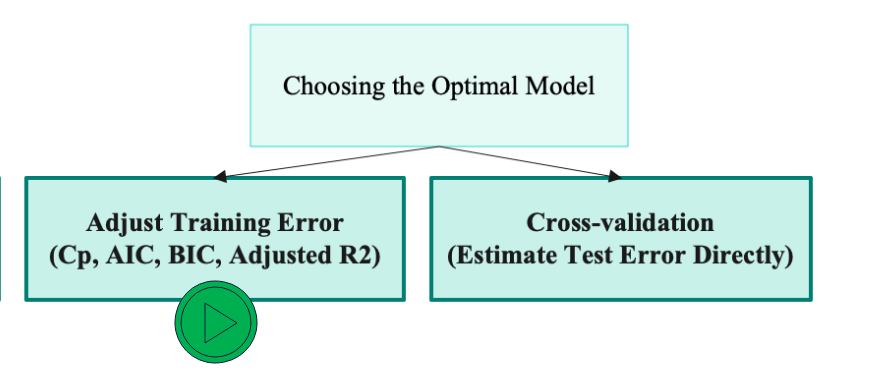

In [165]:
from statsmodels.api import OLS
from ISLP.models import (
    Stepwise,                 # Stepwise selection for choosing terms in regression models
    sklearn_selected,         # Wrapper for applying model selection in sklearn models; 
                        # A class for implementing model selection techniques (like forward selection) using sklearn's OLS.
    sklearn_selection_path    # Tracks model selection path (e.g., adds/removes terms in a sequence)
)
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
print(design)
# X = design.transform(Hitters)

# first_peak(model_spec, direction='forward', min_terms=1, 
# max_terms=1, random_state=0, lower_terms=[], upper_terms=[], 
# initial_terms=[], validator=None, parsimonious=False)#

# Stepwise model selection strategy:
# Stepwise.first_peak is used here to implement stepwise selection (forward or backward).
# 'design' contains the design matrix (the set of terms available for selection).
# direction='forward' means the selection is done in a forward stepwise manner, adding one predictor at a time.
# max_terms=len(design.terms) limits the maximum number of terms (features) that can be selected in the model.
strategy = Stepwise.first_peak(design, direction='forward', max_terms=len(design.terms))

# sklearn_selected: A class for implementing model selection techniques (like forward selection) using sklearn's OLS.
# sklearn_selection_path: Likely for tracking or recording the model selection path.

# Document of the sklearn_selected function: 
# https://islp.readthedocs.io/en/latest/api/generated/ISLP.models.sklearn_wrap.html#sklearn-selected
# ISLP.models.sklearn_wrap.sklearn_selected(model_type, strategy, 
# model_args={}, scoring=None, cv=None)

# 1. OLS: This specifies the model type (Ordinary Least Squares regression).

# 2. strategy: This defines the model selection strategy, such as forward or backward selection.
#    The strategy dictates how predictors will be added or removed during the model-fitting process.

hitters_MSE = sklearn_selected(OLS, strategy)
hitters_MSE.fit(Hitters, Y)
hitters_MSE.selected_state_

ModelSpec(terms=Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object'))


('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

Using `neg_Cp` results in a smaller model, as expected, with just 10 variables selected.

In [ ]:
hitters_Cp = sklearn_selected(OLS,
                               strategy,
                               scoring=neg_Cp)
hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_


('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

### Choosing Among Models Using the Validation Set Approach and Cross-Validation
 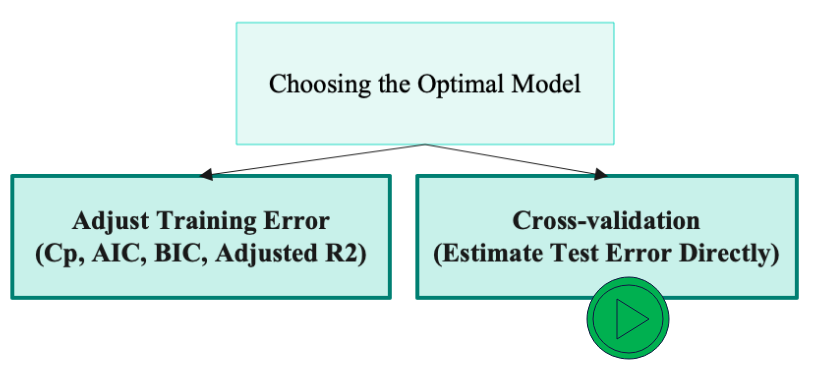
As an  alternative to using $C_p$, we might try cross-validation to select a model in forward selection. For this, we need a
method that stores the full path of models found in forward selection, and allows predictions for each of these. This can be done with the `sklearn_selection_path()` 
estimator from `ISLP.models`. The function `cross_val_predict()` from `ISLP.models`
computes the cross-validated predictions for each of the models
along the path, which we can use to evaluate the cross-validated MSE
along the path.

Here we define a strategy that fits the full forward selection path.
While there are various parameter choices for `sklearn_selection_path()`,
we use the defaults here, which selects the model at each step based on the biggest reduction  in RSS.

In [166]:
strategy = Stepwise.fixed_steps(design,
                                len(design.terms),
                                direction='forward')
full_path = sklearn_selection_path(OLS, strategy)


We now fit the full forward-selection path on the `Hitters` data and compute the fitted values.

In [167]:
full_path.fit(Hitters, Y)
Yhat_in = full_path.predict(Hitters)
Yhat_in.shape


(263, 20)

This gives us an array of fitted values --- 20 steps in all, including the fitted mean for the null model --- which we can use to evaluate
in-sample MSE. As expected, the in-sample MSE improves each step we take,
indicating we must use either the validation or cross-validation
approach to select the number of steps. We fix the y-axis to range from
50,000 to 250,000 to compare to the cross-validation and validation
set MSE below, as well as other methods such as ridge regression, lasso and
principal components regression.

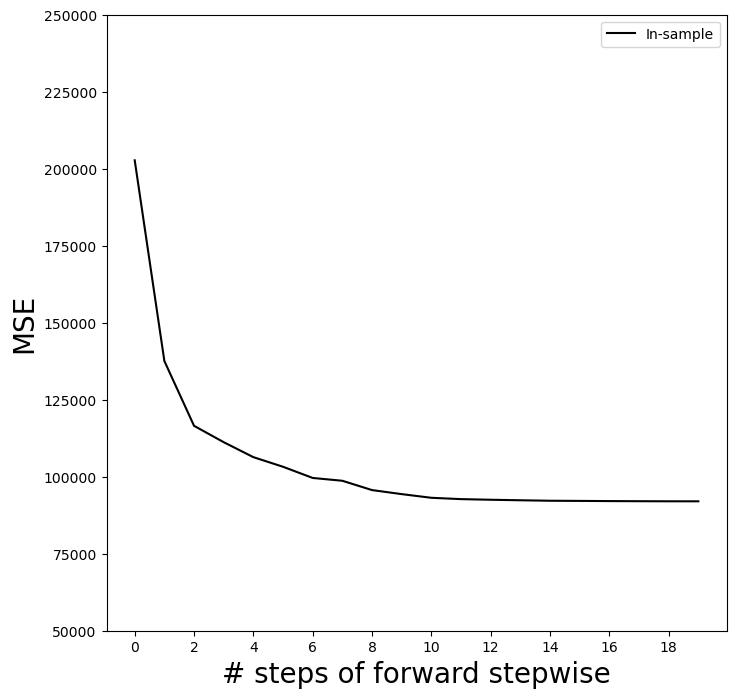

In [168]:
mse_fig, ax = subplots(figsize=(8,8))
insample_mse = ((Yhat_in - Y[:,None])**2).mean(0)
n_steps = insample_mse.shape[0]
ax.plot(np.arange(n_steps),
        insample_mse,
        'k', # color black
        label='In-sample')
ax.set_ylabel('MSE',
              fontsize=20)
ax.set_xlabel('# steps of forward stepwise',
              fontsize=20)
ax.set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax.set_ylim([50000,250000]);


Notice the expression `None` in `Y[:,None]` above.
This adds an axis (dimension) to the one-dimensional array `Y`,
which allows it to be recycled when subtracted from the two-dimensional `Yhat_in`.

We are now ready to use cross-validation to estimate test error along
the model path. We must use *only the training observations* to perform all aspects of model-fitting --- including
variable selection.  Therefore, the determination of which model of a
given size is best must be made using \emph{only the training
  observations} in each training fold. This point is subtle but important.  If the full data
set is used to select the best subset at each step, then the validation
set errors and cross-validation errors that we obtain will not be
accurate estimates of the test error.

We now compute the cross-validated predicted values using 5-fold cross-validation.

In [51]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)
Yhat_cv = skm.cross_val_predict(full_path,
                                Hitters,
                                Y,
                                cv=kfold)
Yhat_cv.shape


NameError: name 'full_path' is not defined

`skm.cross_val_predict()`
The prediction matrix `Yhat_cv` is the same shape as `Yhat_in`; the difference is that the predictions in each row, corresponding to a particular sample index, were made from models fit on a training fold that did not include that row.

At each model along the path, we compute the MSE in each of the cross-validation folds.
These we will average to get the  mean MSE, and can also use the individual values to compute a crude estimate of the standard error of the mean. {The estimate is crude because the five error estimates  are based on overlapping training sets, and hence are not independent.}
Hence we must know the test indices for each cross-validation
split. This can be found by using the `split()` method of `kfold`. Because
we  fixed the random state above, whenever we split any array with the same
number of rows as $Y$ we recover the same training and test indices, though we simply
ignore the training indices below.

In [170]:
cv_mse = []
for train_idx, test_idx in kfold.split(Y):
    errors = (Yhat_cv[test_idx] - Y[test_idx,None])**2
    cv_mse.append(errors.mean(0)) # column means
cv_mse = np.array(cv_mse).T
cv_mse.shape


(20, 5)

We now add the cross-validation error estimates to our MSE plot.
We include the mean error across the five folds, and the estimate of the standard error of the mean. 

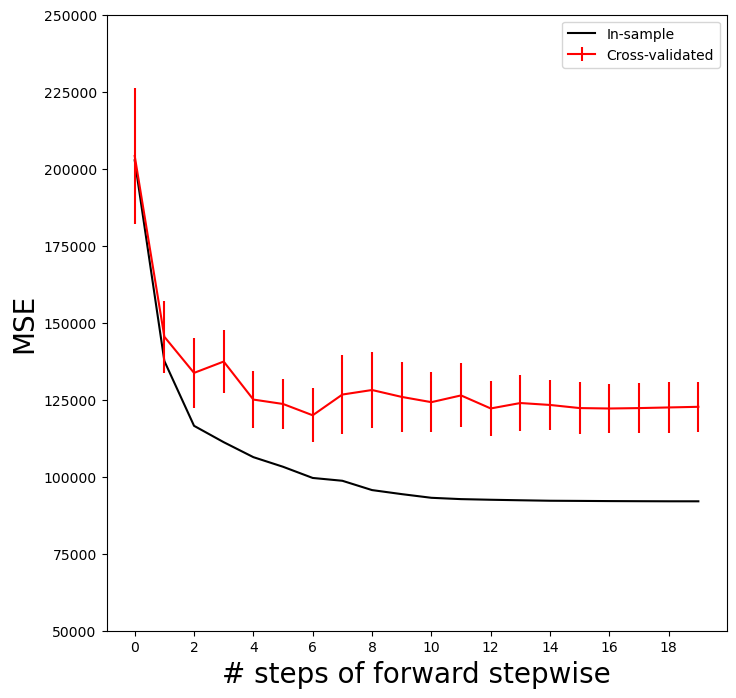

In [171]:
ax.errorbar(np.arange(n_steps), 
            cv_mse.mean(1),
            cv_mse.std(1) / np.sqrt(K),
            label='Cross-validated',
            c='r') # color red
ax.set_ylim([50000,250000])
ax.legend()
mse_fig


To repeat the above using the validation set approach, we simply change our
`cv` argument to a validation set: one random split of the data into a test and training. We choose a test size
of 20%, similar to the size of each test set in 5-fold cross-validation.`skm.ShuffleSplit()`

In [ ]:
validation = skm.ShuffleSplit(n_splits=1, 
                              test_size=0.2,
                              random_state=0)
for train_idx, test_idx in validation.split(Y):
    full_path.fit(Hitters.iloc[train_idx],
                  Y[train_idx])
    Yhat_val = full_path.predict(Hitters.iloc[test_idx])
    errors = (Yhat_val - Y[test_idx,None])**2
    validation_mse = errors.mean(0)


 As for the in-sample MSE case, the validation set approach does not provide standard errors.

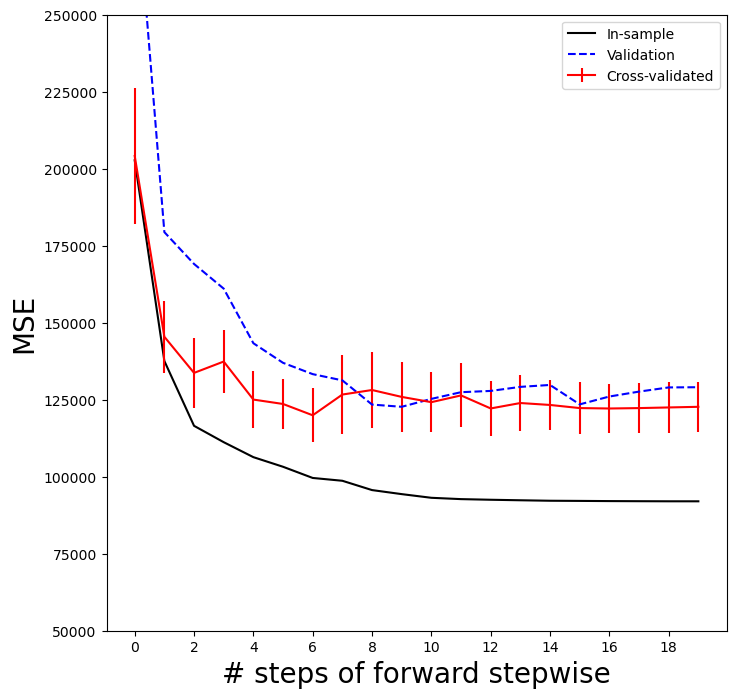

In [ ]:
ax.plot(np.arange(n_steps), 
        validation_mse,
        'b--', # color blue, broken line
        label='Validation')
ax.set_xticks(np.arange(n_steps)[::2])
ax.set_ylim([50000,250000])
ax.legend()
mse_fig


### Best Subset Selection
Forward stepwise is a *greedy* selection procedure; at each step it augments the current set by including one additional variable.  We now apply best subset selection  to the  `Hitters` 
data, which for every subset size, searches for the best set of predictors.  

We will use a package called `l0bnb` to perform
best subset selection.
Instead of constraining the subset to be a given size,
this package produces a path of solutions using the subset size as a
penalty rather than a constraint. Although the distinction is subtle, the difference comes when we cross-validate. 


In [6]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)
Y = np.array(Hitters['Salary'])

D = design.fit_transform(Hitters)
D = D.drop('intercept', axis=1)
X = np.asarray(D)
print(X[:2])


[[3.150e+02 8.100e+01 7.000e+00 2.400e+01 3.800e+01 3.900e+01 1.400e+01
  3.449e+03 8.350e+02 6.900e+01 3.210e+02 4.140e+02 3.750e+02 1.000e+00
  1.000e+00 6.320e+02 4.300e+01 1.000e+01 1.000e+00]
 [4.790e+02 1.300e+02 1.800e+01 6.600e+01 7.200e+01 7.600e+01 3.000e+00
  1.624e+03 4.570e+02 6.300e+01 2.240e+02 2.660e+02 2.630e+02 0.000e+00
  1.000e+00 8.800e+02 8.200e+01 1.400e+01 0.000e+00]]


Here we excluded the first column corresponding to the intercept, as
`l0bnb` will fit the intercept separately. We can find a path using the `fit_path()` function.

In [8]:
path = fit_path(X, 
                Y,
                max_nonzeros=X.shape[1])


Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19
17


In [10]:
print(X.shape[1])
np.power(2,19)

19


524288

The function `fit_path()` returns a list whose values include the fitted coefficients as `B`, an intercept as `B0`, as well as a few other attributes related to the particular path algorithm used. Such details are beyond the scope of this book.

In the example above, we see that at the fourth step in the path, we have two nonzero coefficients in `'B'`, corresponding to the value $0.114$ for the penalty parameter `lambda_0`.
We could make predictions using this sequence of fits on a validation set as a function of `lambda_0`, or with more work using cross-validation.


In [175]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555551,
 'lambda_0': 0.011416248027450178,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

In [20]:
path[0]

{'B': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.77543616, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': 279.70762133645695,
 'lambda_0': 0.1559978371476548,
 'M': 0.5558487113898553,
 'Time_exceeded': False}

In [19]:
path[0]

{'B': array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.77543616, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': 279.70762133645695,
 'lambda_0': 0.1559978371476548,
 'M': 0.5558487113898553,
 'Time_exceeded': False}

We can use cross-validation to compare the models

# <a id='toc1_2_'></a>[Ridge Regression and the Lasso](#toc0_)
We will use the `sklearn.linear_model` package (for which
we use `skl` as shorthand below)
to fit ridge and  lasso regularized linear models on the `Hitters` data.
We start with the model matrix `X` (without an intercept) that we computed in the previous section on best subset regression.

# <a id='toc1_2_1_'></a>[Ridge Regression](#toc0_)
We will use the function `skl.ElasticNet()` to fit both  ridge and the lasso.
To fit a *path* of ridge regressions models, we use
`skl.ElasticNet.path()`, which can fit both ridge and lasso, as well as a hybrid mixture;  ridge regression
corresponds to `l1_ratio=0`.
It is good practice to standardize the columns of `X` in these applications, if the variables are measured in different units. Since `skl.ElasticNet()` does no normalization, we have to take care of that ourselves.
Since we
standardize first, in order to find coefficient
estimates on the original scale, we must *unstandardize*
the coefficient estimates. The parameter
$\lambda$ in (\ref{Ch6:ridge}) and (\ref{Ch6:LASSO}) is called `alphas` in `sklearn`. In order to
be consistent with the rest of this chapter, we use `lambdas`
rather than `alphas` in what follows.  {At the time of publication, ridge fits like the one in code chunk [22] issue unwarranted convergence warning messages; we expect these to disappear as this package matures.}

In [22]:
X

array([[315.,  81.,   7., ...,  43.,  10.,   1.],
       [479., 130.,  18., ...,  82.,  14.,   0.],
       [496., 141.,  20., ...,  11.,   3.,   1.],
       ...,
       [475., 126.,   3., ..., 113.,   7.,   0.],
       [573., 144.,   9., ..., 131.,  12.,   0.],
       [631., 170.,   9., ...,   4.,   3.,   0.]])

In [23]:
# Centering the design matrix by subtracting the mean of each column (feature).
# X.mean(0) computes the mean of each feature (across all rows), and [None, :] ensures the result is broadcasted
# across all rows in X. This operation centers each feature to have a mean of 0.
Xs = X - X.mean(0)[None, :]

# Calculating the standard deviation of each feature (column).
# X.std(0) computes the standard deviation of each feature. This will be used for scaling.
X_scale = X.std(0)

# Dividing each column of Xs by its corresponding standard deviation to scale the features.
# This step standardizes the data to have mean 0 and standard deviation 1, which is important
# for models like ElasticNet that are sensitive to the scale of the predictors.
Xs = Xs / X_scale[None, :]

# Generating a range of lambda (regularization) values for ElasticNet.
# np.linspace(8, -2, 100) creates 100 points between 10^8 and 10^-2 on a logarithmic scale.
# These lambda values control the amount of regularization. Dividing by Y.std() ensures that the regularization 
# is appropriately scaled to the standard deviation of the target variable Y.
lambdas = 10**np.linspace(8, -2, 100) / Y.std()

# Solving the ElasticNet path for all lambda values.
# ElasticNet is a combination of L1 (Lasso) and L2 (Ridge) regularization. Here, l1_ratio=0. means that we are only
# applying L2 regularization (Ridge regression). ElasticNet.path computes the coefficients for a sequence of 
# regularization parameters (lambdas).
# The result contains a solution array where each column corresponds to the coefficient estimates for a given lambda.
soln_array = skl.ElasticNet.path(Xs, Y, l1_ratio=0., alphas=lambdas)[1]

# Checking the shape of the solution array to understand the number of features and lambda values used.
# The shape will tell you how many solutions (rows for features and columns for different lambdas) were generated.
soln_array.shape

# Printing the first three lambda values for inspection to see how they vary.
print('lambdas:', lambdas[:3])

lambdas: [222093.7908986  176005.53111773 139481.3734265 ]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 64428165.36474803, tolerance: 12885.7065737425
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning:

Here we extract the array of coefficients corresponding to the solutions along the regularization path.
By default the `skl.ElasticNet.path` method fits a path along
an automatically selected range of $\lambda$ values, except for the case when
`l1_ratio=0`, which results in ridge regression (as is the case here). {The reason is rather technical; for all models except ridge, we can find the smallest value of $\lambda$ for which all coefficients are zero. For ridge this value is $\infty$.}  So here
we have chosen to implement the function over a grid of values ranging
from $\lambda=10^{8}$ to $\lambda=10^{-2}$ scaled by the standard
deviation of $y$, essentially covering the full range of scenarios
from the null model containing only the intercept, to the least
squares fit.

Associated with each value of $\lambda$ is a vector of ridge
regression coefficients,   that can be accessed by
a column of `soln_array`. In this case, `soln_array` is a $19 \times 100$ matrix, with
19 rows (one for each predictor) and 100
columns (one for each value of $\lambda$).

We transpose this matrix and turn it into a data frame to facilitate viewing and plotting.

In [24]:
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))
soln_path.index.name = 'negative log(lambda)'
soln_path


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,-0.000029,-0.000390,0.000609,0.000052,-0.000011,-0.000006
-12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,-0.000037,-0.000492,0.000769,0.000065,-0.000014,-0.000007
-11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009
-11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
-11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216195,-387.775826,89.573601,-12.273926,476.079273,257.271255,-213.124780,31.258215,-58.457857,78.761266,53.622113,-22.208456,-12.402891
10.017243,-290.879272,337.113713,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458404,89.000707,-12.661459,477.031349,257.966790,-213.280891,31.256434,-58.448850,78.761240,53.645147,-22.198802,-12.391969
10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997470,88.537380,-12.971603,477.791860,258.523025,-213.405740,31.254958,-58.441682,78.761230,53.663357,-22.191071,-12.383205


We plot the paths to get a sense of how the coefficients vary with $\lambda$.
To control the location of the legend we first set `legend` to `False` in the
plot method, adding it afterward with the `legend()` method of `ax`.

<>:3: SyntaxWarning: invalid escape sequence '\l'
<>:3: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_46398/301550802.py:3: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


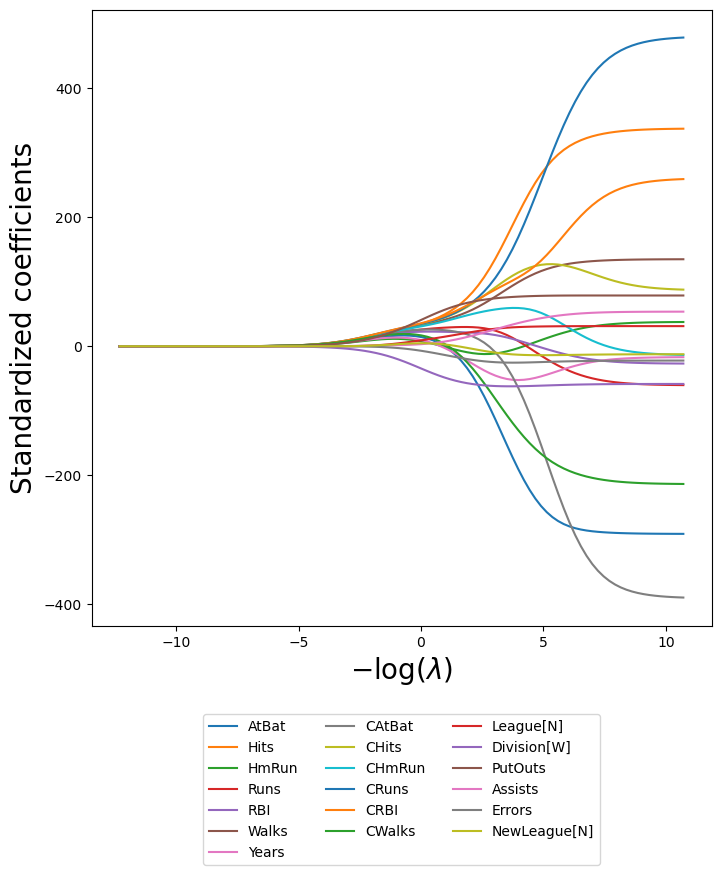

In [32]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficients', fontsize=20)
# move legend to the bottom:
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)

(We have used `latex` formatting in the horizontal label, in order to format the Greek $\lambda$ appropriately.) 
We expect the coefficient estimates to be much smaller, in terms of
$\ell_2$ norm, when a large value of $\lambda$ is used, as compared to
when a small value of $\lambda$ is used. (Recall that the  $\ell_2$ norm is the square root of the sum of squared coefficient values.) We display  the coefficients at the $40$th step,
where $\lambda$ is 25.535.

In [26]:
beta_hat = soln_path.loc[soln_path.index[39]]
lambdas[39], beta_hat


(25.53538897200662,
 AtBat           5.433750
 Hits            6.223582
 HmRun           4.585498
 Runs            5.880855
 RBI             6.195921
 Walks           6.277975
 Years           5.299767
 CAtBat          7.147501
 CHits           7.539495
 CHmRun          7.182344
 CRuns           7.728649
 CRBI            7.790702
 CWalks          6.592901
 League[N]       0.042445
 Division[W]    -3.107159
 PutOuts         4.605263
 Assists         0.378371
 Errors         -0.135196
 NewLeague[N]    0.150323
 Name: -3.240065292879872, dtype: float64)

Let’s compute the $\ell_2$ norm of the standardized coefficients.

In [ ]:
np.linalg.norm(beta_hat)

24.17061720144378

In contrast, here is the $\ell_2$ norm when $\lambda$ is 2.44e-01.
Note the much larger $\ell_2$ norm of the
coefficients associated with this smaller value of $\lambda$.

In [ ]:
beta_hat = soln_path.loc[soln_path.index[59]]
lambdas[59], np.linalg.norm(beta_hat)


(0.24374766133488554, 160.42371017725839)

## Manually replicate the standardied coefficients, np.ling.norm:

$
\|\beta\|_2 = \sqrt{\sum_{i=1}^{n} \beta_i^2}
$

In [43]:
df_norm = pd.DataFrame(beta_hat)
df_norm.columns = ['beta_hat']
df_norm['sq'] = df_norm**2
df_norm_sum = df_norm['sq'].sum()
df_norm.head(2)
print(np.sqrt(df_norm_sum))


24.17061720144378


Above we normalized `X` upfront, and fit the ridge model using `Xs`.
The `Pipeline()`  object
in `sklearn` provides a clear way to separate feature
normalization from the fitting of the ridge model itself.

In [44]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio=0)
scaler = StandardScaler(with_mean=True,  with_std=True)
pipe = Pipeline(steps=[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.24374766133488554, l1_ratio=0))])

We show that it gives the same $\ell_2$ norm as in our previous fit on the standardized data.

In [ ]:
np.linalg.norm(ridge.coef_)

160.4237101772591

 Notice that the operation `pipe.fit(X, Y)` above has changed the `ridge` object, and in particular has added attributes such as `coef_` that were not there before. 
### <a id='toc1_2_2_'></a>[Estimating Test Error of Ridge Regression](#toc0_)
Choosing an *a priori* value of $\lambda$ for ridge regression is
difficult if not impossible. We will want to use the validation method
or cross-validation to select the tuning parameter. The reader may not
be surprised that the  `Pipeline()` approach can be used in
`skm.cross_validate()` with either a validation method
(i.e. `validation`) or $k$-fold cross-validation.

We fix the random state of the splitter
so that the results obtained will be reproducible.

In [45]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=0.5,
                              random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+06, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([134214.00419204])

The test MSE is 1.342e+05.  Note
that if we had instead simply fit a model with just an intercept, we
would have predicted each test observation using the mean of the
training observations. We can get the same result by fitting a ridge regression model
with a *very* large value of $\lambda$. Note that `1e10`
means $10^{10}$.

In [46]:
ridge.alpha = 1e10
results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv=validation)
-results['test_score']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([231788.32155285])

Obviously choosing $\lambda=0.01$ is arbitrary,  so we will  use cross-validation or the validation-set
approach to choose the tuning parameter $\lambda$.
The object `GridSearchCV()`  allows exhaustive
grid search to choose such a parameter.

We first use the validation set method
to choose $\lambda$.

In [48]:
param_grid = {'ridge__alpha': lambdas}
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.005899006046740856, l1_ratio=0))])

Alternatively, we can use 5-fold cross-validation.

In [54]:
grid = skm.GridSearchCV(pipe, 
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
grid.fit(X, Y)
grid.best_params_['ridge__alpha']
grid.best_estimator_


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge', ElasticNet(alpha=0.01185247763144249, l1_ratio=0))])

Recall we set up the `kfold` object for 5-fold cross-validation on page~\pageref{line:choos-among-models}. We now plot the cross-validated MSE as a function of $-\log(\lambda)$, which has shrinkage decreasing from left
to right.

<>:6: SyntaxWarning: invalid escape sequence '\l'
<>:6: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_23800/3621806029.py:6: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


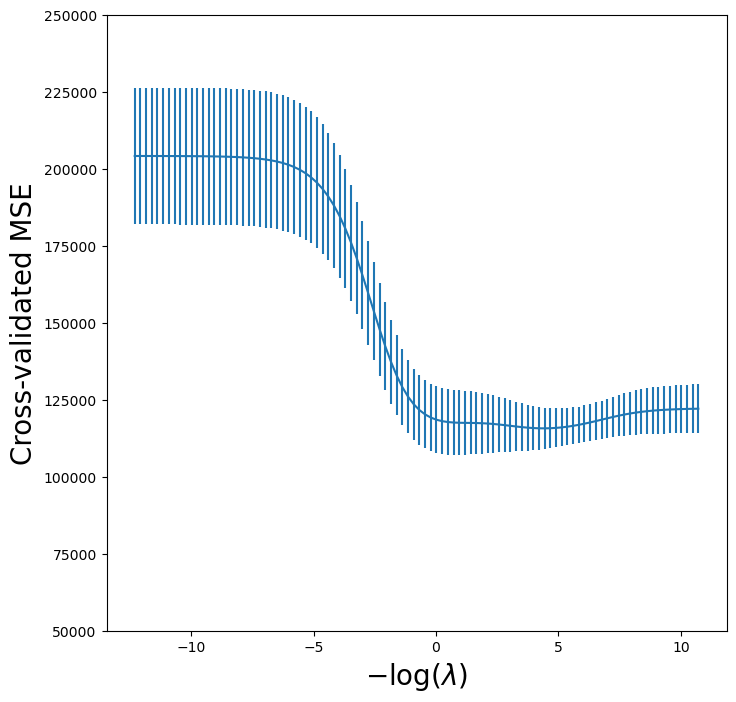

In [ ]:
ridge_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            -grid.cv_results_['mean_test_score'],
            yerr=grid.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


One can cross-validate different metrics to choose a parameter. The default
metric for `skl.ElasticNet()` is test $R^2$.
Let’s compare $R^2$ to MSE for cross-validation here.

In [52]:
K = 5
kfold = skm.KFold(K,
                  random_state=0,
                  shuffle=True)

grid_r2 = skm.GridSearchCV(pipe, 
                           param_grid,
                           cv=kfold)
grid_r2.fit(X, Y)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+07, tolerance: 3.759e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.101e+07, tolerance: 4.201e+03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.lin

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge',
                                        ElasticNet(alpha=10000000000.0,
                                                   l1_ratio=0))]),
             param_grid={'ridge__alpha': array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606...
       4.67486141e-03, 3.70474772e-03, 2.93594921e-03, 2.32668954e-03,
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05])})

Finally, let’s plot the results for cross-validated $R^2$.

Since  R^2  is the default scoring metric for ElasticNet in scikit-learn, this value represents the mean cross-validated  R^2  score for each model with different lambdas.

<>:5: SyntaxWarning: invalid escape sequence '\l'
<>:5: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_46398/537964502.py:5: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


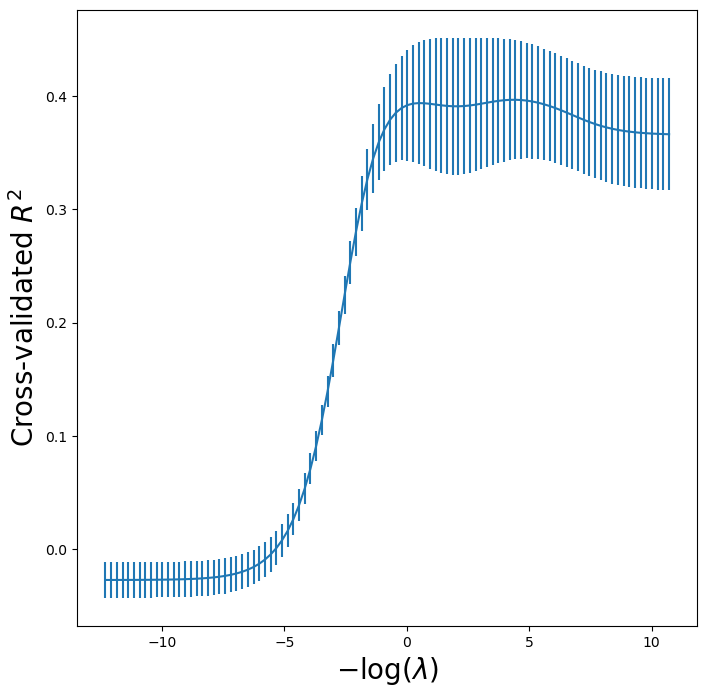

In [53]:
r2_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            grid_r2.cv_results_['mean_test_score'],
            yerr=grid_r2.cv_results_['std_test_score'] / np.sqrt(K))
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated $R^2$', fontsize=20);


### <a id='toc1_2_3_'></a>[Fast Cross-Validation for Solution Paths](#toc0_)
The ridge, lasso, and elastic net can be efficiently fit along a sequence of $\lambda$ values, creating what is known as a *solution path* or *regularization path*. Hence there is specialized code to fit
such paths, and to choose a suitable value of $\lambda$ using cross-validation. Even with
identical splits the results will not agree *exactly* with our `grid`
above because the standardization of each feature  in `grid` is carried out on each fold,
while in `pipeCV` below it is carried out only **once**.
Nevertheless, the results are similar as the normalization
is relatively stable across folds.

In [56]:
ridgeCV = skl.ElasticNetCV(alphas=lambdas, 
                           l1_ratio=0,
                           cv=kfold)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)])
pipeCV.fit(X, Y)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 18795326.355502333, tolerance: 3759.109166869193
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarnin

Pipeline(steps=[('scaler', StandardScaler()),
                ('ridge',
                 ElasticNetCV(alphas=array([2.22093791e+05, 1.76005531e+05, 1.39481373e+05, 1.10536603e+05,
       8.75983676e+04, 6.94202082e+04, 5.50143278e+04, 4.35979140e+04,
       3.45506012e+04, 2.73807606e+04, 2.16987845e+04, 1.71959156e+04,
       1.36274691e+04, 1.07995362e+04, 8.55844774e+03, 6.78242347e+03,
       5.37495461e+03, 4.25955961e+03,...
       1.84386167e-03, 1.46122884e-03, 1.15799887e-03, 9.17694298e-04,
       7.27257037e-04, 5.76338765e-04, 4.56738615e-04, 3.61957541e-04,
       2.86845161e-04, 2.27319885e-04, 1.80147121e-04, 1.42763513e-04,
       1.13137642e-04, 8.96596467e-05, 7.10537367e-05, 5.63088712e-05,
       4.46238174e-05, 3.53636122e-05, 2.80250579e-05, 2.22093791e-05]),
                              cv=KFold(n_splits=5, random_state=0, shuffle=True),
                              l1_ratio=0))])

Let’s produce a plot again of the cross-validation error to see that
it is similar to using `skm.GridSearchCV`.

<>:8: SyntaxWarning: invalid escape sequence '\l'
<>:8: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_46398/1695195493.py:8: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


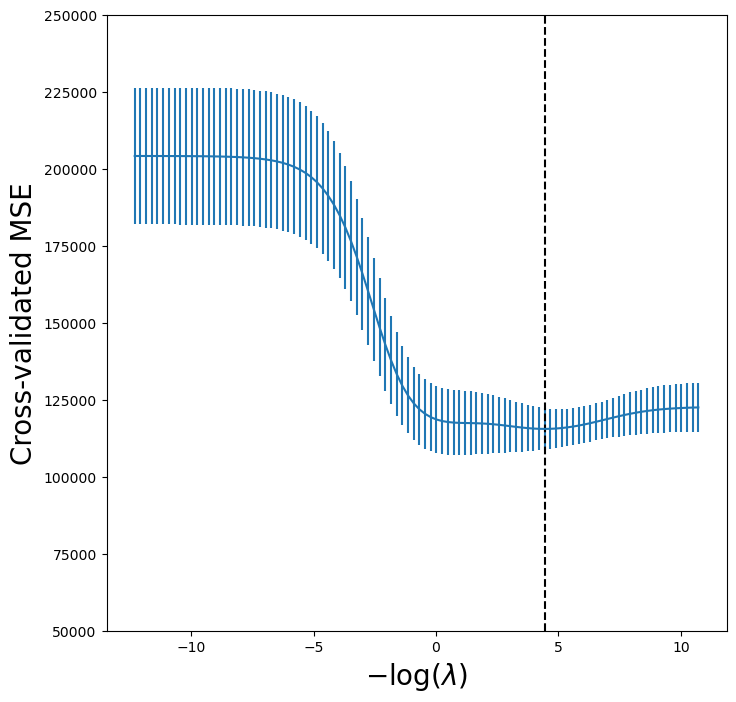

In [57]:
tuned_ridge = pipeCV.named_steps['ridge']
ridgeCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(lambdas),
            tuned_ridge.mse_path_.mean(1),
            yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);


We see that the value of $\lambda$ that results in the
smallest cross-validation error is 1.19e-02, available
as the value `tuned_ridge.alpha_`. What is the test MSE
associated with this value of $\lambda$?

In [58]:
np.min(tuned_ridge.mse_path_.mean(1))


115526.70630987917

This represents a further improvement over the test MSE that we got
using $\lambda=4$.  Finally, `tuned_ridge.coef_`
has the coefficients fit on the **entire** data set
at this value of  $\lambda$.

In [59]:
tuned_ridge.coef_


array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
          3.64888723,  108.90953869,  -50.81896152, -105.15731984,
        122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
       -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
         40.07350744,  -25.02151514,  -13.68429544])

As expected, none of the coefficients are zero—ridge regression does
not perform variable selection!

### <a id='toc1_2_4_'></a>[Evaluating Test Error of Cross-Validated Ridge](#toc0_)
Choosing $\lambda$ using cross-validation provides a single regression
estimator, similar to fitting a linear regression model as we saw in
Chapter~\ref{Ch3:linreg}. It is therefore reasonable to estimate what its test error
is. We run into a problem here in that cross-validation will have
*touched* all of its data in choosing $\lambda$, hence we have no
further data to estimate test error. A compromise is to do an initial
split of the data into two disjoint sets: a training set and a test set.
We then fit a cross-validation
tuned ridge regression on the training set, and evaluate its performance on the test set.
We might call this cross-validation nested
within the validation set approach. A priori there is no reason to use
half of the data for each of the two sets in validation. Below, we use
75% for training and 25% for test, with the estimator being ridge
regression tuned using 5-fold cross-validation.  This can be achieved
in code as follows:

In [60]:
outer_valid = skm.ShuffleSplit(n_splits=1, 
                               test_size=0.25,
                               random_state=1)
inner_cv = skm.KFold(n_splits=5,
                     shuffle=True,
                     random_state=2)
ridgeCV = skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio=0,
                           cv=inner_cv)
pipeCV = Pipeline(steps=[('scaler', scaler),
                         ('ridge', ridgeCV)]);


In [61]:
results = skm.cross_validate(pipeCV, 
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')
-results['test_score']


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16002961.893047336, tolerance: 3200.6325551004925
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:664: ConvergenceWarni

array([132393.84003227])

### <a id='toc1_2_5_'></a>[The Lasso](#toc0_)
We saw that ridge regression with a wise choice of $\lambda$ can
outperform least squares as well as the null model on the
 `Hitters`  data set. We now ask whether the lasso can yield
either a more accurate or a more interpretable model than ridge
regression. In order to fit a lasso model, we once again use the
`ElasticNetCV()`  function; however, this time we use the argument
`l1_ratio=1`. Other than that change, we proceed just as we did in
fitting a ridge model.

In [62]:
# Define an ElasticNet cross-validation model (essentially Lasso when l1_ratio=1)
# ElasticNetCV is used to automatically select the best lambda (regularization strength) 
# by performing cross-validation.
# n_alphas=100: The number of different alpha values (regularization strength) to try.
# l1_ratio=1: This makes the ElasticNet model equivalent to Lasso (L1 regularization only).
# cv=kfold: Using K-fold cross-validation to evaluate different models.
lassoCV = skl.ElasticNetCV(n_alphas=100, 
                           l1_ratio=1,    # This forces Lasso, since Lasso is pure L1 regularization
                           cv=kfold)      # Cross-validation for model tuning

# Create a pipeline with the standard scaler and the LassoCV model.
# The pipeline ensures that data scaling and model fitting are done sequentially.
# The scaler step ensures that the data is standardized (mean=0, std=1), 
# which is important for models like Lasso that are sensitive to the scale of features.
pipeCV = Pipeline(steps=[('scaler', scaler),  # Standardizes the data (important for Lasso)
                         ('lasso', lassoCV)]) # Performs Lasso regression with cross-validation

# Fit the pipeline to the data (X, Y)
# This step applies the scaler to standardize the data and fits the LassoCV model.
# The LassoCV model will select the best lambda (regularization strength) based on cross-validation.
pipeCV.fit(X, Y)

# Retrieve the tuned Lasso model from the pipeline
# 'tuned_lasso' contains the ElasticNetCV (Lasso) model with the best alpha (lambda) chosen through cross-validation.
tuned_lasso = pipeCV.named_steps['lasso']

# Get the best alpha (lambda) value selected by cross-validation
# This is the optimal regularization strength chosen based on cross-validation to minimize the model's error.
best_alpha = tuned_lasso.alpha_

# Print the selected alpha
print("Best alpha selected by cross-validation:", best_alpha)


Best alpha selected by cross-validation: 3.1472370031649866


In [63]:
lambdas, soln_array = skl.Lasso.path(Xs, 
                                    Y,
                                    l1_ratio=1,
                                    n_alphas=100)[:2]
soln_path = pd.DataFrame(soln_array.T,
                         columns=D.columns,
                         index=-np.log(lambdas))


We can see from the coefficient plot of the standardized coefficients that depending on the choice of
tuning parameter, some of the coefficients will be exactly equal to
zero.

<>:4: SyntaxWarning: invalid escape sequence '\l'
<>:4: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_46398/75587183.py:4: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


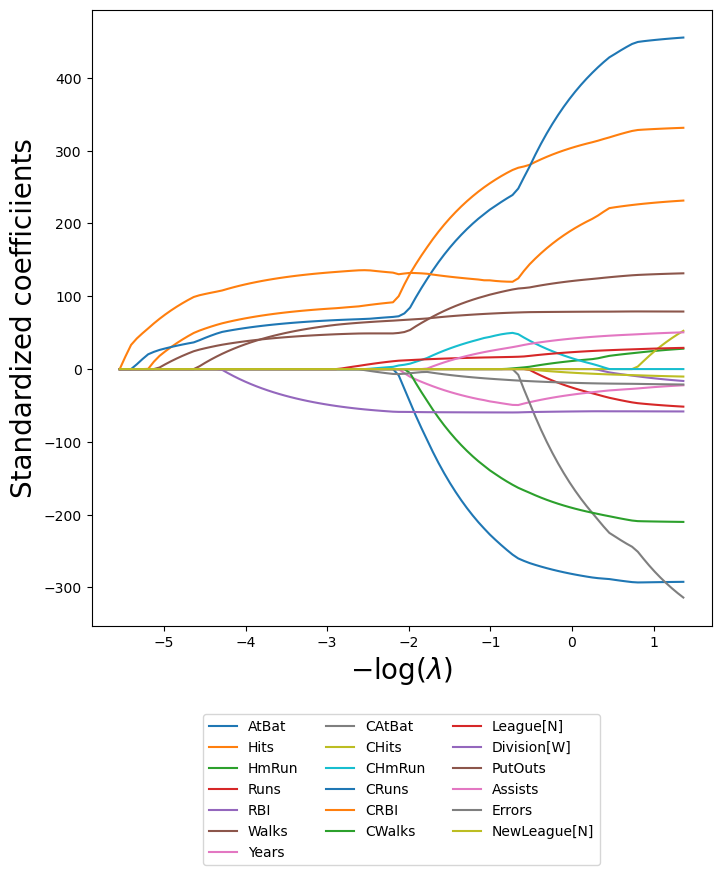

In [65]:
path_fig, ax = subplots(figsize=(8,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=3)
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Standardized coefficiients', fontsize=20);


The smallest cross-validated error is lower than the test set MSE of the null model
and of least squares, and very similar to the test MSE of 115526.71 of ridge
regression (page~\pageref{page:MSECVRidge}) with $\lambda$ chosen by cross-validation.

In [66]:
np.min(tuned_lasso.mse_path_.mean(1))


114690.73118253727

Let’s again produce a plot of the cross-validation error.


<>:7: SyntaxWarning: invalid escape sequence '\l'
<>:7: SyntaxWarning: invalid escape sequence '\l'
/var/folders/b3/bg9_2k0x1vs5gh92_9mqd5yw0000gp/T/ipykernel_46398/3184589275.py:7: SyntaxWarning: invalid escape sequence '\l'
  ax.set_xlabel('$-\log(\lambda)$', fontsize=20)


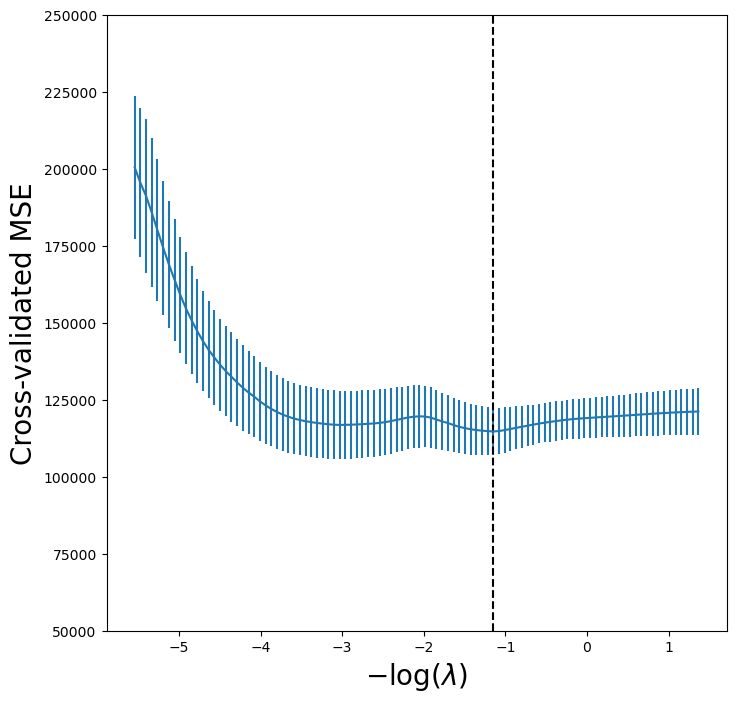

In [67]:
lassoCV_fig, ax = subplots(figsize=(8,8))
ax.errorbar(-np.log(tuned_lasso.alphas_),
            tuned_lasso.mse_path_.mean(1),
            yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log(tuned_lasso.alpha_), c='k', ls='--')
ax.set_ylim([50000,250000])
ax.set_xlabel('$-\log(\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20);

However, the lasso has a substantial advantage over ridge regression
in that the resulting coefficient estimates are sparse. Here we see
that 6 of the 19 coefficient estimates are exactly zero. So the lasso
model with $\lambda$ chosen by cross-validation contains only 13
variables.

In [68]:
tuned_lasso.coef_


array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])

As in ridge regression, we could evaluate the test error
of cross-validated lasso by first splitting into
test and training sets and internally running
cross-validation on the training set. We leave
this as an exercise.